# K-means


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy
import seaborn as sns
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Upload the csv file from local browser
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [2]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
data_x = data.iloc[:,[0,18]]
data_x.head(5)


,Age,MonthlyIncome
0,41,5993
1,49,5130
2,37,2090
3,33,2909
4,27,3468


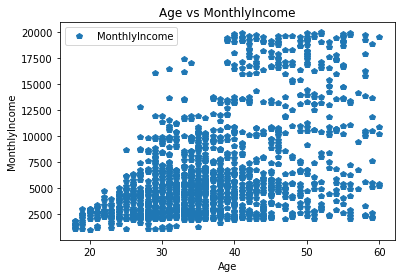

In [5]:
data.plot(x="Age",y="MonthlyIncome",style='p')
plt.title('Age vs MonthlyIncome')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()

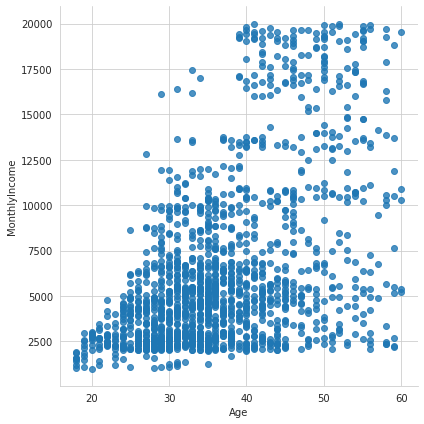

In [7]:
sns.set_style('whitegrid')
sns.lmplot('Age','MonthlyIncome',data=data,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [8]:
x_array = np.array(data_x)
print(x_array)

[[  41 5993]
 [  49 5130]
 [  37 2090]
 ...
 [  27 6142]
 [  49 5390]
 [  34 4404]]


In [9]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.54761905, 0.26245392],
       [0.73809524, 0.21700895],
       [0.45238095, 0.0569247 ],
       ...,
       [0.21428571, 0.27030016],
       [0.73809524, 0.23070037],
       [0.38095238, 0.1787783 ]])

In [10]:
kmeans = KMeans(n_clusters = 5,random_state=40)
kmeans.fit(x_scaled)

KMeans(n_clusters=5, random_state=40)

In [11]:
print(kmeans.cluster_centers_)

[[0.45475685 0.16845563]
 [0.76632302 0.2712597 ]
 [0.214342   0.1251694 ]
 [0.71770662 0.83918487]
 [0.40350275 0.45360007]]


In [12]:
print(kmeans.labels_)
data["kluster"]=kmeans.labels_

[0 1 0 ... 2 1 0]


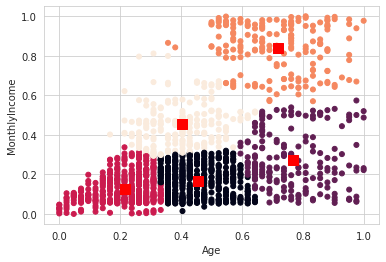

In [13]:
utput = plt.scatter(x_scaled[:,0],x_scaled[:,1],s=100,c=data.kluster,marker = ".",alpha=1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=100,marker = "s",alpha=1)
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()

Conclusion:Young people are generally considered low-income groups, middle-aged people are largely in the middle-income group, and some are in the low-income group and high-income group. Older adults are more divided, with fewer in the middle-income group, but many in the upper-income and low-income groups

# Hierarchical clustering

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_y = data.iloc[:,[0,18]]
data_y.head(5)

,Age,MonthlyIncome
0,41,5993
1,49,5130
2,37,2090
3,33,2909
4,27,3468


In [20]:
from scipy.cluster.vq import whiten

data_y['x_scaled'] = whiten(data_y['Age'])
data_y['y_scaled'] = whiten(data_y['MonthlyIncome'])

In [22]:
from scipy.cluster.hierarchy import linkage, fcluster

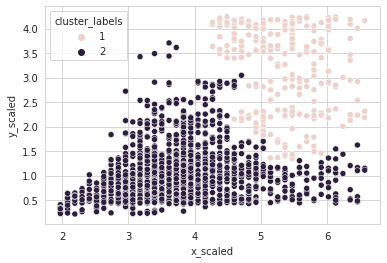

In [24]:
distance_matrix = linkage(data_y[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')
data_y['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data_y);

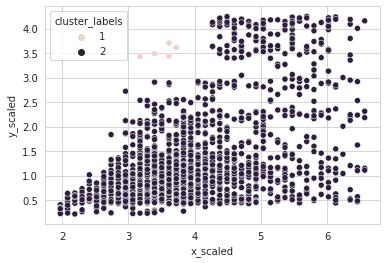

In [25]:
# Use the linkage()
distance_matrix = linkage(data_y[['x_scaled', 'y_scaled']], method='single', metric='euclidean')

# Assign cluster labels
data_y['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data_y);

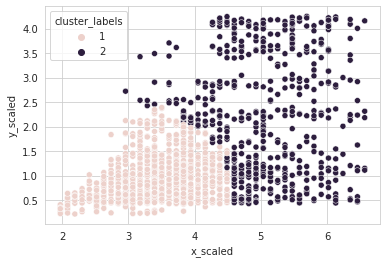

In [26]:
# Use the linkage()
distance_matrix = linkage(data_y[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
data_y['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data_y);

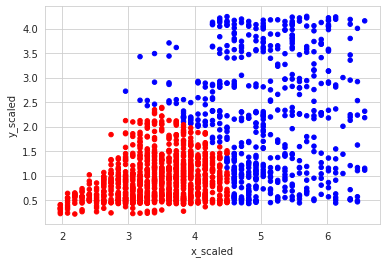

In [27]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot the scatter plot
data_y.plot.scatter(x='x_scaled', y='y_scaled', c=data_y['cluster_labels'].apply(lambda x: colors[x]));

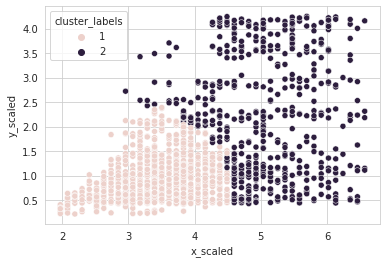

In [29]:
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data_y)

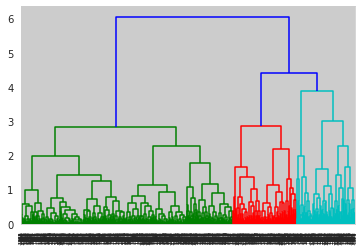

In [30]:
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

In [31]:
%timeit sum([1, 3, 2])

The slowest run took 89.40 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 176 ns per loop


In [33]:
%timeit linkage(data_y[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

10 loops, best of 5: 45.4 ms per loop


# Gaussian mixture models clustering

In [40]:
try:
    # Check if notebook is running in Google Colab
    import google.colab
    # Get additional files from Github
    !wget https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/latent_variable_models_util.py
    # Install additional dependencies
    !pip install daft==0.1.0
except:
    pass

--2021-11-30 09:24:39--  https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/latent_variable_models_util.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1765 (1.7K) [text/plain]
Saving to: ‘latent_variable_models_util.py’

latent_variable_mod 100%[===================>]   1.72K  --.-KB/s    in 0s      

2021-11-30 09:24:39 (25.7 MB/s) - ‘latent_variable_models_util.py’ saved [1765/1765]

  Created wheel for daft: filename=daft-0.1.0-py3-none-any.whl size=11394 sha256=9615969b739559f6f9c37b4d04db81f25686bc14cb265dd1e5506565c3fea7d4
  Stored in directory: /root/.cache/pip/wheels/c5/a0/aa/1b00104fc9c9ebbdfa9636ea64df39d67b46345f2b8f1d24fc
Successfully built daft
  Attempting uninstall: daft
    Found existing installation: daft 0.0.4
 

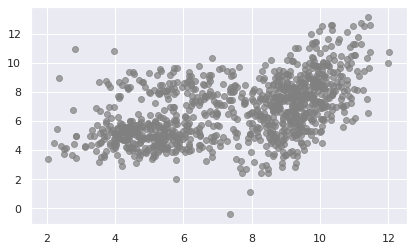

In [41]:
from latent_variable_models_util import n_true, mu_true, sigma_true
from latent_variable_models_util import generate_data, plot_data, plot_densities

%matplotlib inline

X, T = generate_data(n=n_true, mu=mu_true, sigma=sigma_true)

plot_data(X, color='grey')

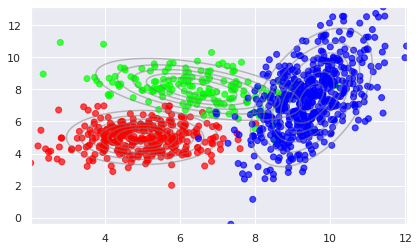

In [42]:
plot_data(X, color=T)
plot_densities(X, mu=mu_true, sigma=sigma_true)

In [43]:
def e_step(X, pi, mu, sigma):
    """
    Computes posterior probabilities from data and parameters.
    
    Args:
        X: observed data (N, D).
        pi: prior probabilities (C,).
        mu: mixture component means (C, D).
        sigma: mixture component covariances (C, D, D).

    Returns:
        Posterior probabilities (N, C).
    """

    N = X.shape[0]
    C = mu.shape[0]
    q = np.zeros((N, C))

    # Equation (6)
    for c in range(C):
        q[:, c] = mvn(mu[c], sigma[c]).pdf(X) * pi[c]        
    return q / np.sum(q, axis=-1, keepdims=True) 

In [44]:
def m_step(X, q):
    """
    Computes parameters from data and posterior probabilities.

    Args:
        X: data (N, D).
        q: posterior probabilities (N, C).

    Returns:
        tuple of
        - prior probabilities (C,).
        - mixture component means (C, D).
        - mixture component covariances (C, D, D).
    """    
    
    N, D = X.shape
    C = q.shape[1]    
    sigma = np.zeros((C, D, D))
    
    # Equation (16)
    pi = np.sum(q, axis=0) / N

    # Equation (17)
    mu = q.T.dot(X) / np.sum(q.T, axis=1, keepdims=True)
    
    # Equation (18)
    for c in range(C):
        delta = (X - mu[c])
        sigma[c] = (q[:, [c]] * delta).T.dot(delta) / np.sum(q[:, c])
        
    return pi, mu, sigma    

In [45]:
def lower_bound(X, pi, mu, sigma, q):
    """
    Computes lower bound from data, parameters and posterior probabilities.

    Args:
        X: observed data (N, D).
        pi: prior probabilities (C,).
        mu: mixture component means (C, D).
        sigma: mixture component covariances (C, D, D).
        q: posterior probabilities (N, C).

    Returns:
        Lower bound.
    """    

    N, C = q.shape
    ll = np.zeros((N, C))
    
    # Equation (19)
    for c in range(C):
        ll[:,c] = mvn(mu[c], sigma[c]).logpdf(X)
    return np.sum(q * (ll + np.log(pi) - np.log(np.maximum(q, 1e-8))))

In [46]:
def random_init_params(X, C):
    D = X.shape[1]
    pi = np.ones(C) / C
    mu = mvn(mean=np.mean(X, axis=0), cov=[np.var(X[:, 0]), 
                                           np.var(X[:, 1])]).rvs(C).reshape(C, D)
    sigma = np.tile(np.eye(2), (C, 1, 1))
    return pi, mu, sigma


def train(X, C, n_restarts=10, max_iter=50, rtol=1e-3):
    q_best = None
    pi_best = None
    mu_best = None
    sigma_best = None
    lb_best = -np.inf

    for _ in range(n_restarts):
        pi, mu, sigma = random_init_params(X, C)
        prev_lb = None

        try:
            for _ in range(max_iter):
                q = e_step(X, pi, mu, sigma)
                pi, mu, sigma = m_step(X, q)
                lb = lower_bound(X, pi, mu, sigma, q)

                if lb > lb_best:
                    q_best = q
                    pi_best = pi
                    mu_best = mu
                    sigma_best = sigma
                    lb_best = lb

                if prev_lb and np.abs((lb - prev_lb) / prev_lb) < rtol:
                    break

                prev_lb = lb
        except np.linalg.LinAlgError:
            # Singularity. One of the components collapsed
            # onto a specific data point. Start again ...
            pass

    return pi_best, mu_best, sigma_best, q_best, lb_best

pi_best, mu_best, sigma_best, q_best, lb_best = train(X, C=3)
print(f'Lower bound = {lb_best:.2f}')

Lower bound = -3944.11


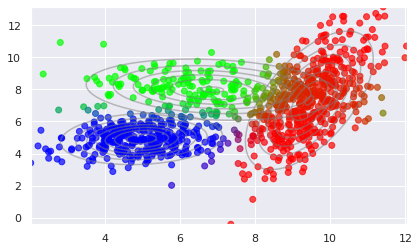

In [47]:
plot_data(X, color=q_best)
plot_densities(X, mu=mu_best, sigma=sigma_best)

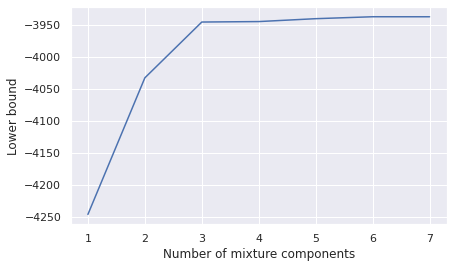

In [48]:
import matplotlib.pyplot as plt

Cs = range(1, 8)
lbs = []

for C in Cs:
    lb = train(X, C)[-1]
    lbs.append(lb)
    
plt.plot(Cs, lbs)
plt.xlabel('Number of mixture components')
plt.ylabel('Lower bound');

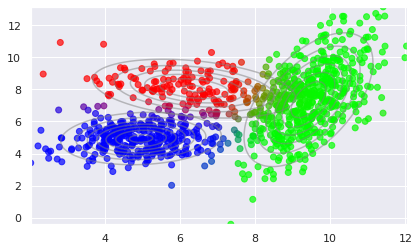

In [49]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=10)
gmm.fit(X)

plot_data(X, color=gmm.predict_proba(X))
plot_densities(X, mu=gmm.means_, sigma=gmm.covariances_)

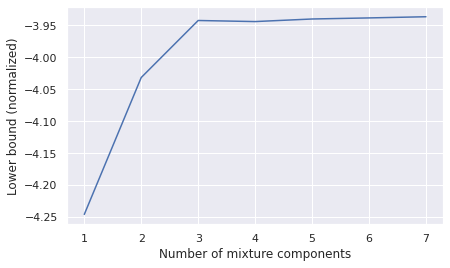

In [50]:
Cs = range(1, 8)
lbs = []

for C in Cs:
    gmm = GaussianMixture(n_components=C, n_init=10)
    gmm.fit(X)
    lbs.append(gmm.lower_bound_)
    
plt.plot(Cs, lbs)
plt.xlabel('Number of mixture components')
plt.ylabel('Lower bound (normalized)');

#  DB Scan clustering

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [80]:
data_z=pd.read_csv("Mall_Customers.csv")
data_z.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

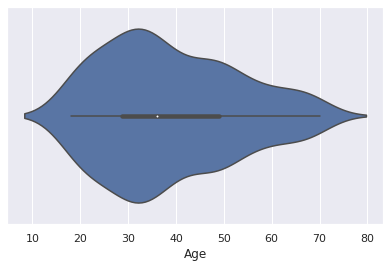

In [82]:
sns.violinplot(data_z['Age']);

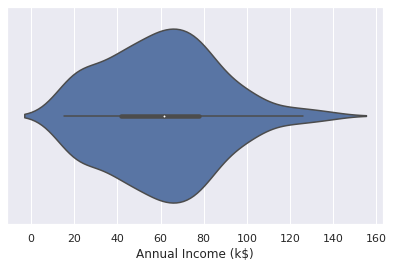

In [83]:
sns.violinplot(data_z['Annual Income (k$)']);

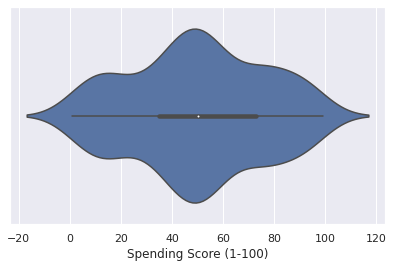

In [84]:
sns.violinplot(data_z['Spending Score (1-100)'])
plt.show()

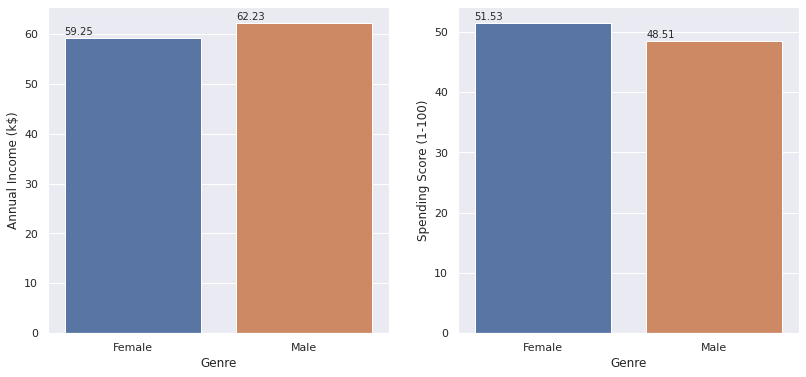

In [87]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
cluster_type = data_z.groupby(['Genre'])['Annual Income (k$)'].mean().reset_index()
ax=sns.barplot(x = 'Genre', y='Annual Income (k$)', data=cluster_type)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.subplot(1,2,2)
cluster_type = data_z.groupby(['Genre'])['Spending Score (1-100)'].mean().reset_index()
ax=sns.barplot(x = 'Genre', y='Spending Score (1-100)', data=cluster_type)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

In [88]:
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
slot = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70+']

data_z['Age_Range']=pd.cut(data_z['Age'],bins,labels=slot)

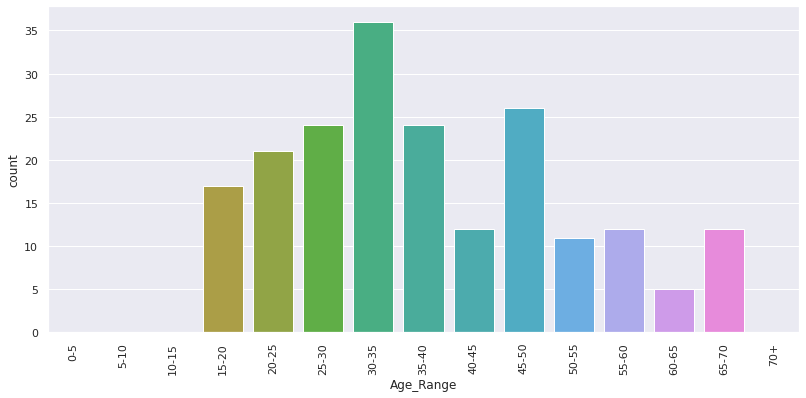

In [89]:
plt.figure(figsize=(12,6))
edu=sns.countplot(x="Age_Range", data=data_z)
edu.set_xticklabels(edu.get_xticklabels(),rotation=90)
plt.show()

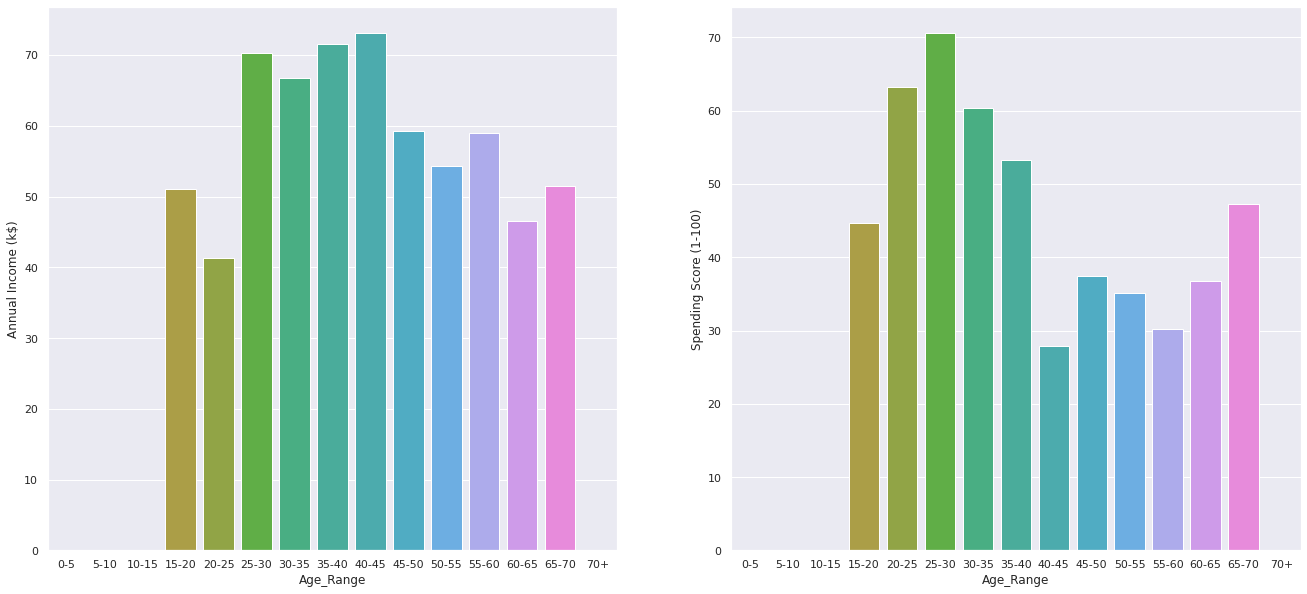

In [90]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
cluster_type = data_z.groupby(['Age_Range'])['Annual Income (k$)'].mean().reset_index()
sns.barplot(x = 'Age_Range', y='Annual Income (k$)', data=cluster_type)
plt.subplot(1,2,2)
cluster_type = data_z.groupby(['Age_Range'])['Spending Score (1-100)'].mean().reset_index()
sns.barplot(x = 'Age_Range', y='Spending Score (1-100)', data=cluster_type)
plt.show()

In [91]:
data_z.drop('Age_Range',axis=1,inplace=True)
data_z.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [94]:
hopkins(data_z.drop(['CustomerID','Genre'],axis=1))

0.7283915334434228

In [76]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [98]:
data_z_data=data_z.drop(['CustomerID','Genre','Age'],axis=1)
# instantiate
scaler = MinMaxScaler()

# fit_transform
data_z_scaled = scaler.fit_transform(data_z_data)
data_z_scaled.shape

(200, 2)

In [100]:
#Converting the scaled data to data frame
data_z_scaled = pd.DataFrame(data_z_scaled)
data_z_scaled.columns = data_z_data.columns
data_z_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


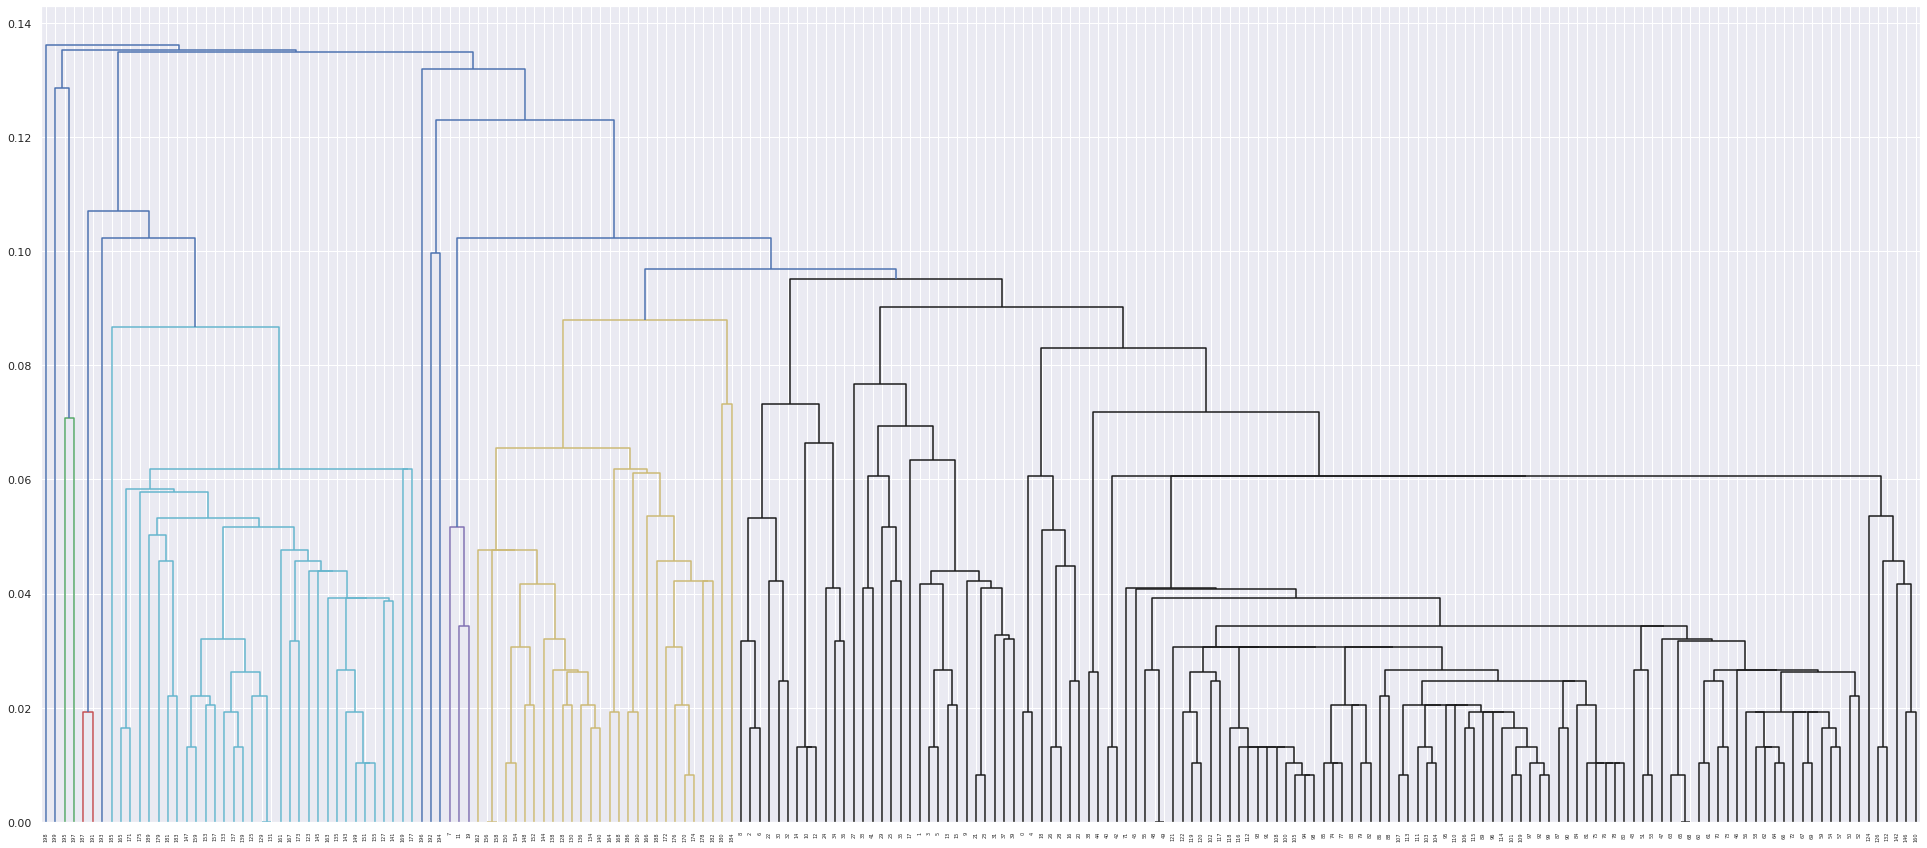

In [102]:
# single linkage
plt.figure(figsize=(30,15))
mergings = linkage(data_z_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

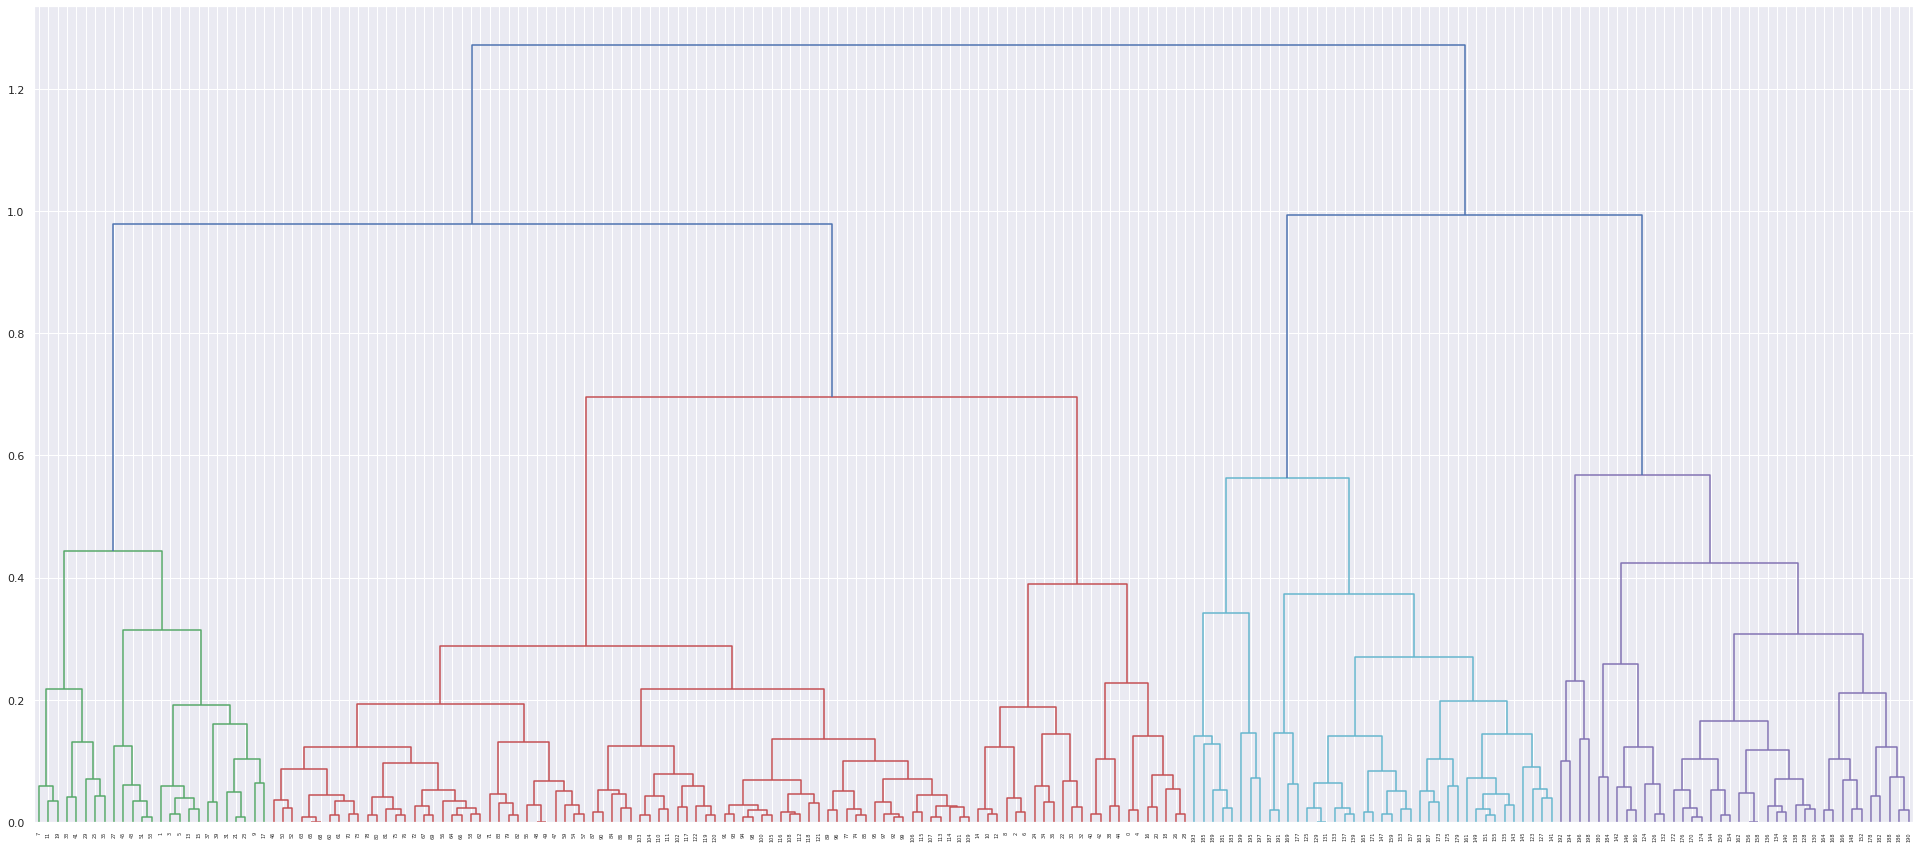

In [104]:
plt.figure(figsize=(30,15))
mergings = linkage(data_z_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [105]:
cluster_l = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_l

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [106]:
data_z['cluster_id'] = cluster_l
data_z.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


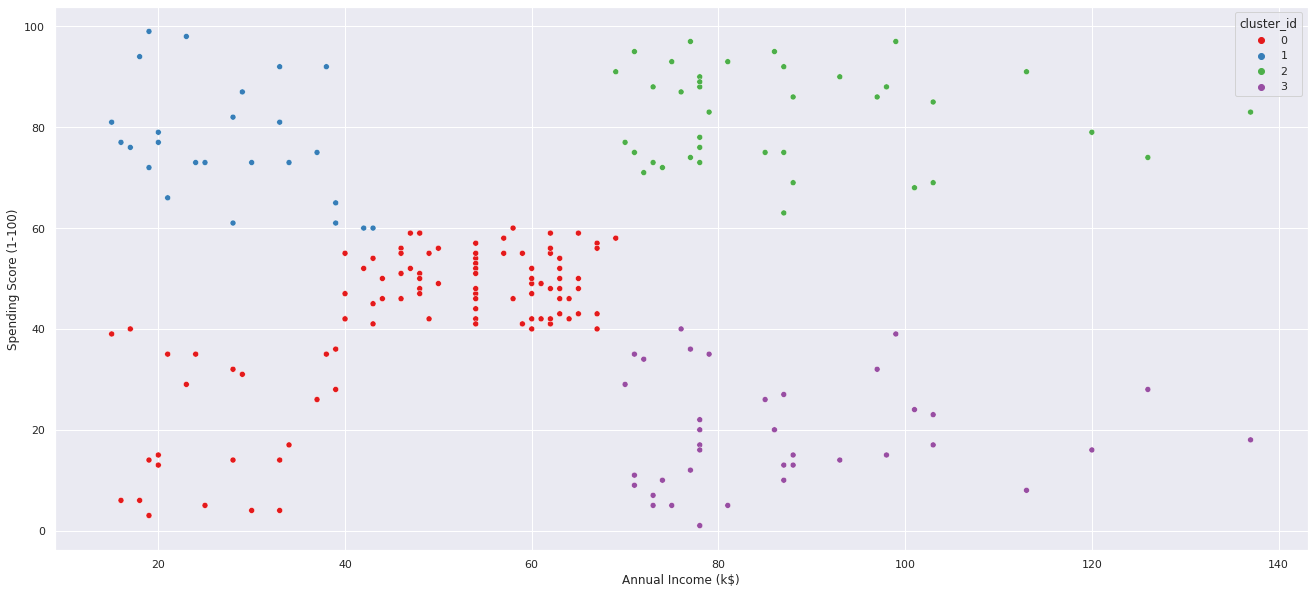

In [108]:
plt.figure(figsize=(20,10))

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster_id', data = data_z, palette = 'Set1');

In [109]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [111]:
model=DBSCAN(eps=0.1,min_samples=10).fit(data_z_scaled)
print(model.labels_)

[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  0
 -1  0 -1  1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  2  1  2  1  2  3  2  3  2  1  2  3  2  3  2  3  2  3  2  1  2
  3  2  1  2  3  2  3  2  3  2  3  2  3  2  3  2  1  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3  2  3  2 -1  2  3  2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [112]:
# assign cluster labels
data_z['cluster_lab'] = model.labels_
data_z.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
0,1,Male,19,15,39,0,-1
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,0,-1
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,0,-1


In [113]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda : colors[x % len(colors)])

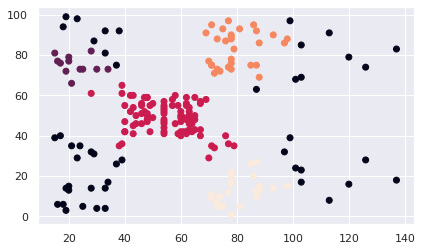

In [114]:
plt.scatter(data_z['Annual Income (k$)'], data_z['Spending Score (1-100)'], c=data_z['cluster_lab']);

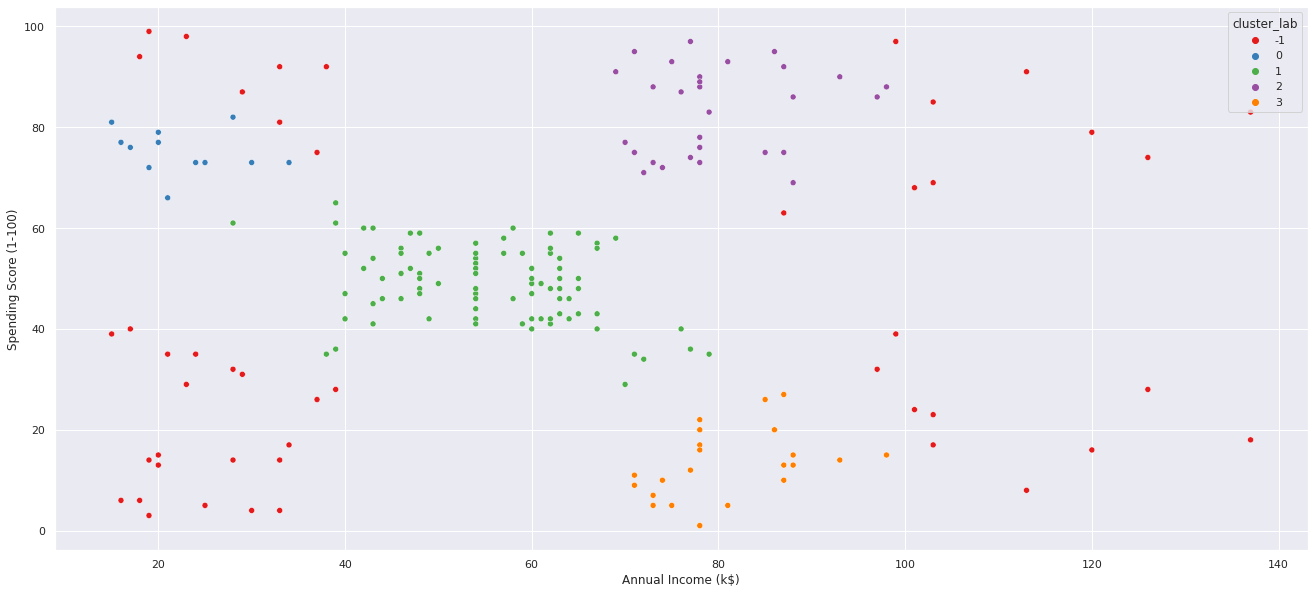

In [115]:
plt.figure(figsize=(20,10))

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster_lab', data = data_z, palette = 'Set1');

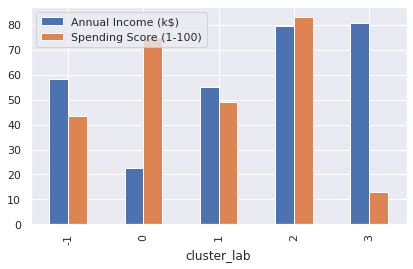

In [117]:
data_z.drop(['CustomerID','Age','Genre','cluster_id'],axis=1).groupby('cluster_lab').mean().plot(kind='bar')
plt.show()

In [118]:
data_z[data_z['cluster_lab']==2]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
123,124,Male,39,69,91,2,2
125,126,Female,31,70,77,2,2
127,128,Male,40,71,95,2,2
129,130,Male,38,71,75,2,2
131,132,Male,39,71,75,2,2
133,134,Female,31,72,71,2,2
135,136,Female,29,73,88,2,2
137,138,Male,32,73,73,2,2
139,140,Female,35,74,72,2,2
141,142,Male,32,75,93,2,2


In [119]:
data_z[data_z['cluster_lab']==3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
128,129,Male,59,71,11,3,3
130,131,Male,47,71,9,3,3
134,135,Male,20,73,5,3,3
136,137,Female,44,73,7,3,3
138,139,Male,19,74,10,3,3
140,141,Female,57,75,5,3,3
144,145,Male,25,77,12,3,3
148,149,Female,34,78,22,3,3
150,151,Male,43,78,17,3,3
152,153,Female,44,78,20,3,3


In [120]:
data_z[data_z['cluster_lab']==1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
27,28,Male,35,28,61,1,1
40,41,Female,65,38,35,0,1
42,43,Male,48,39,36,0,1
43,44,Female,31,39,61,1,1
45,46,Female,24,39,65,1,1
...,...,...,...,...,...,...,...
126,127,Male,43,71,35,3,1
132,133,Female,25,72,34,3,1
142,143,Female,28,76,40,3,1
146,147,Male,48,77,36,3,1


In [121]:
data_z[data_z['cluster_lab']==-1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id,cluster_lab
0,1,Male,19,15,39,0,-1
2,3,Female,20,16,6,0,-1
4,5,Female,31,17,40,0,-1
6,7,Female,35,18,6,0,-1
7,8,Female,23,18,94,1,-1
8,9,Male,64,19,3,0,-1
10,11,Male,67,19,14,0,-1
11,12,Female,35,19,99,1,-1
12,13,Female,58,20,15,0,-1
14,15,Male,37,20,13,0,-1
